<a href="https://colab.research.google.com/github/marcelaalins/Python/blob/main/machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importando os modelos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv ("/content/pima-data.csv")
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True


In [4]:
#verificando o formato dos dados
df.shape

(768, 10)

In [6]:
#verificando as primeiras linhas do dataset
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [7]:
#verificando se existem valores nulos
df.isnull().values.any()

False

In [8]:
#definindo as classes
#map é pra fazer um dicionário, trocar true pra 1 e false pra 0
diabetes_map = {True: 1, False :0}

In [9]:
#aplicando o mapeamento ao dataset
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [10]:
#verificando as primeiras linhas do dataset
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [12]:
#verificando como os dados estão distribuidos
#len é a função de lenght = conta a quantidade de informações de cada variável estabelecida
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Número de Casos Verdadeiros:", num_true)
print("Número de Casos Falso:", num_false)

Número de Casos Verdadeiros: 268
Número de Casos Falso: 500


In [13]:
import sklearn as sk

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#seleção de variáveis preditoras (Feature Selection) - predição = "prever" o futuro com base no histórico de dados
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp',\
             'thickness','insulin','bmi','diab_pred','age','skin']

In [16]:
#Variáveis a ser prevista
atrib_prev = ['diabetes']

In [17]:
#criando objetos
X = df[atributos].values
y = df[atrib_prev].values

In [18]:
X

array([[  6.    , 148.    ,  72.    , ...,   0.627 ,  50.    ,   1.378 ],
       [  1.    ,  85.    ,  66.    , ...,   0.351 ,  31.    ,   1.1426],
       [  8.    , 183.    ,  64.    , ...,   0.672 ,  32.    ,   0.    ],
       ...,
       [  5.    , 121.    ,  72.    , ...,   0.245 ,  30.    ,   0.9062],
       [  1.    , 126.    ,  60.    , ...,   0.349 ,  47.    ,   0.    ],
       [  1.    ,  93.    ,  70.    , ...,   0.315 ,  23.    ,   1.2214]])

In [19]:
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [21]:
#Criando dados de treino e de teste
#random state é uma busca de números aleatórios, mas controlados
#split = significado de divisão. é como os dados serão divididos
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, random_state = 123)

In [22]:
#Imprimindo os resultados
print("dados de treino:", X_treino.shape, y_treino.shape)
print("dados de teste:", X_teste.shape, y_teste.shape)

dados de treino: (576, 9) (576, 1)
dados de teste: (192, 9) (192, 1)


In [24]:
print("# Valores 0 no dataframe por coluna:")
print(len(df.loc[df['glucose_conc'] == 0]))
print(len(df.loc[df['diastolic_bp'] == 0]))
print(len(df.loc[df['thickness'] == 0]))
print(len(df.loc[df['insulin'] == 0]))
print(len(df.loc[df['bmi'] == 0]))
print(len(df.loc[df['age'] == 0]))

# Valores 0 no dataframe por coluna:
5
35
227
374
11
0


In [25]:
#Transformando os valores iguais a zero em média
#Neste momento, usando o transformador de imputação para completar os valores ausentes,
from sklearn.impute import SimpleImputer

In [26]:
#Criando objeto 
preenche_0 = SimpleImputer(missing_values = 0)

In [27]:
# Substituindo os valores iguais a zero pela média dos dados
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

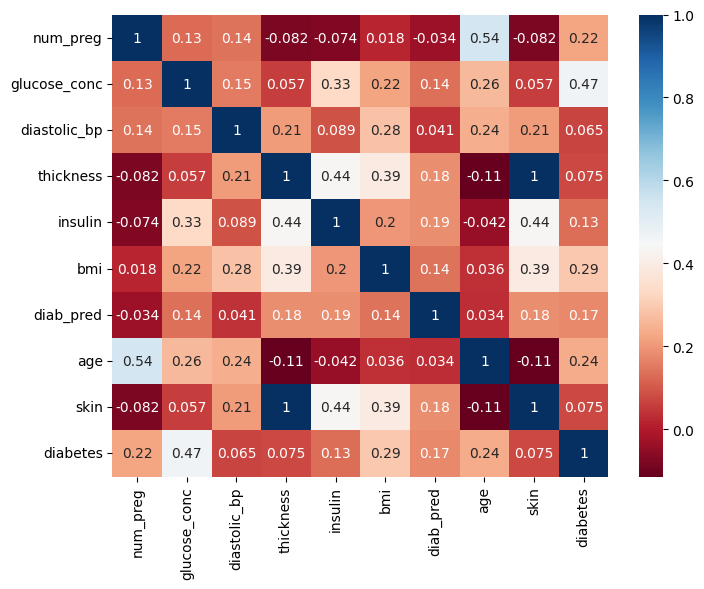

In [35]:
correlacao = df.corr()
correlacao
plt.rc('figure', figsize = (8,6))
ax = sns.heatmap(correlacao, cmap='RdBu', annot = True)

In [36]:
#Utilizando um classificador Naive Bayes
#Esse classificador é muito utilizado no âmbito de saúde, pois trabalha com probabilidade de algum evento acontecer

from sklearn.naive_bayes import GaussianNB

In [37]:
# Criando o modelo preditivo
modelo_1 = GaussianNB()

In [39]:
modelo_1.fit(X_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [41]:
#Treinando o modelo corrigido
modelo_1.fit(X_treino, y_treino.ravel())
#vamos usar .ravel quando os dados, após a separação, estão em formato de array e podem não ser aceitos por alguns algoritmos

GaussianNB()

In [42]:
from sklearn import metrics

In [49]:
nb_predict_train = modelo_1.predict(X_treino)

In [50]:
nb_predict_train

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [51]:
ac_nb_train = metrics.accuracy_score(y_treino, nb_predict_train)

In [53]:
print("Acurácia:", ac_nb_train)

Acurácia: 0.75


In [54]:
nb_predict_test = modelo_1.predict(X_teste)

In [55]:
nb_predict_test

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [56]:
# ac é só uma abreviação para accuracy (acurácia)
ac_nb_test = metrics.accuracy_score(y_teste, nb_predict_test)

In [57]:
print("Acurácia:", ac_nb_test)

Acurácia: 0.765625


In [59]:
print("Classification Report")
print(metrics.classification_report(y_teste, nb_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       119
           1       0.70      0.67      0.69        73

    accuracy                           0.77       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.76      0.77      0.76       192



In [61]:
from sklearn.ensemble import RandomForestClassifier
#esse modelo pode treinar mais do que o necessário pro meu output de dados, mas não sempre

In [62]:
modelo_2 = RandomForestClassifier(random_state = 123)
modelo_2.fit(X_treino, y_treino)

<ipython-input-62-7a86460813da>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_2.fit(X_treino, y_treino)


RandomForestClassifier(random_state=123)

In [66]:
modelo_2 = RandomForestClassifier(random_state = 123)
modelo_2.fit(X_treino, y_treino.ravel())

RandomForestClassifier(random_state=123)

In [67]:
#Verificando dados de treino
rf_predict_train = modelo_2.predict(X_treino)
ac_rf_train = metrics.accuracy_score(y_treino, rf_predict_train)
print("Acurácia:", ac_rf_train)

Acurácia: 1.0


In [68]:
# Verificando nos dados de teste
rf_predict_test = modelo_2.predict(X_teste)
ac_rf_test = metrics.accuracy_score(y_teste, rf_predict_test)
print("Acurácia:", ac_rf_test)

Acurácia: 0.7864583333333334


In [70]:
print("Classification Report")
print(metrics.classification_report
      (y_teste, rf_predict_test, labels =[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.75      0.73        73
           0       0.84      0.81      0.82       119

    accuracy                           0.79       192
   macro avg       0.77      0.78      0.78       192
weighted avg       0.79      0.79      0.79       192



In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
#Treinando o terceiro modelo usando Regressão Logística
modelo_3 = LogisticRegression(random_state = 5, max_iter = 1000)
modelo_3.fit(X_treino,y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=5)

In [73]:
#Treinando o terceiro modelo usando Regressão Logística
modelo_3 = LogisticRegression(random_state = 5, max_iter = 1000)
modelo_3.fit(X_treino,y_treino.ravel())

LogisticRegression(max_iter=1000, random_state=5)

In [74]:
# Verificando os dados de treino
lr_predict_train = modelo_3.predict(X_treino)
ac_lr_train = metrics.accuracy_score(y_treino, lr_predict_train)
print("Acurácia:", ac_lr_train)

Acurácia: 0.7760416666666666


In [75]:
#testando 
lr_predict_test = modelo_3.predict(X_teste)

In [78]:
# Verificando os dados do teste
ac_lr_test = metrics.accuracy_score(y_teste, lr_predict_test)
print("Acurácia:", ac_lr_test)

print("Classification Report")
print(metrics.classification_report(y_teste,lr_predict_test))

Acurácia: 0.796875
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       119
           1       0.78      0.64      0.71        73

    accuracy                           0.80       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.80      0.80      0.79       192



In [79]:
#Máquina de Suporte de Vetores (SVC)

from sklearn.svm import SVC

In [80]:
modelo_4 = SVC(random_state = 5)

In [81]:
modelo_4.fit(X_treino, y_treino.ravel())

SVC(random_state=5)

In [86]:
# Verificando os dados de treino
svc_predict_train = modelo_4.predict(X_treino)
ac_predict_train = metrics.accuracy_score(y_treino, svc_predict_train)
print("Acurácia:", ac_predict_train)

Acurácia: 0.7604166666666666
